In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [49]:
df=pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [51]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [52]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: >

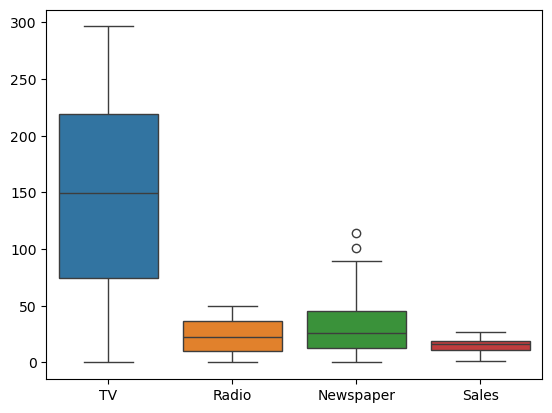

In [53]:
sns.boxplot(df)

In [54]:
from datasist.structdata import detect_outliers
out = detect_outliers(df, 0, features=["Newspaper"])

In [55]:
len(out)

2

In [56]:
df.drop(out, inplace=True)

In [57]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


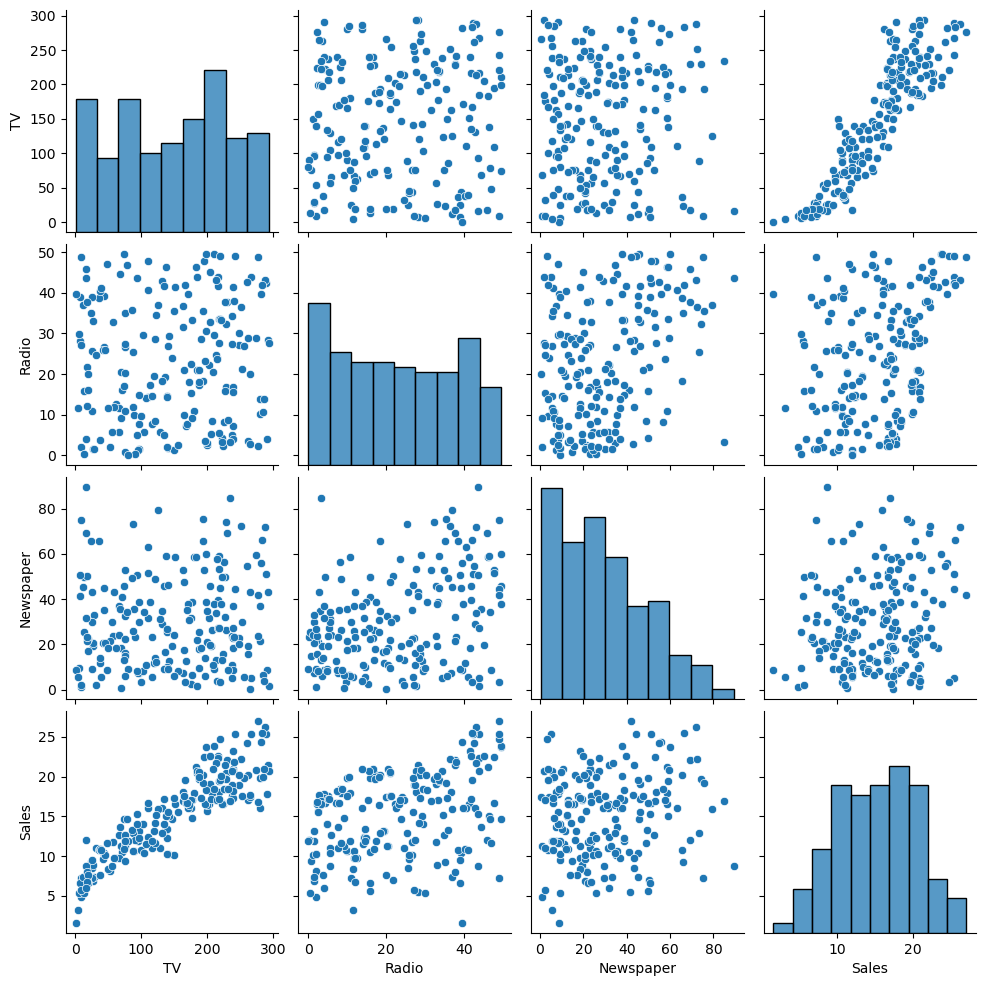

In [58]:
sns.pairplot(df)

<Axes: >

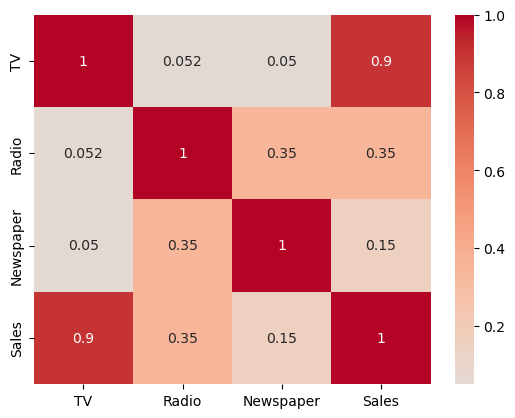

In [59]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", center=0)

<Axes: xlabel='TV', ylabel='Sales'>

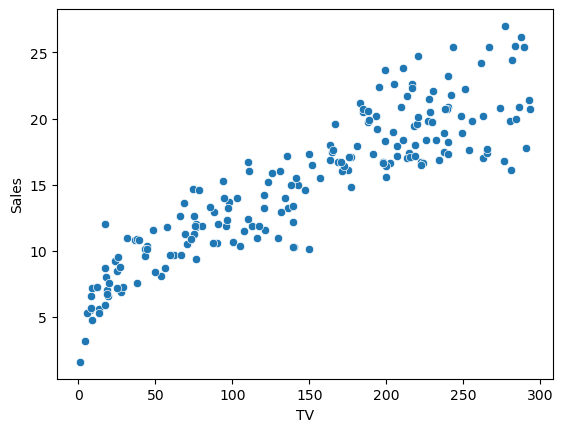

In [60]:
sns.scatterplot(x="TV", y="Sales", data=df)

<Axes: xlabel='Newspaper', ylabel='Sales'>

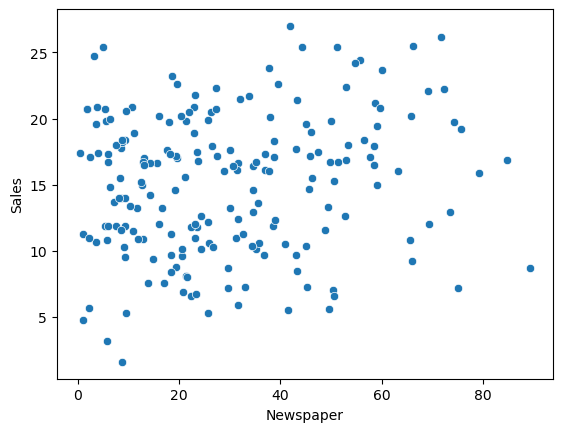

In [61]:
sns.scatterplot(x="Newspaper", y="Sales", data=df)

<Axes: xlabel='Radio', ylabel='Sales'>

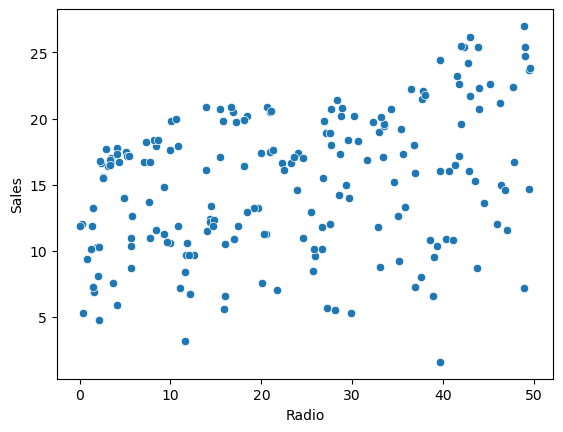

In [62]:
sns.scatterplot(x="Radio", y="Sales", data=df)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [64]:
x=df.drop("Sales", axis=1)
y=df["Sales"] 

In [65]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [66]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
accurasy = r2_score(y_test, y_pred)
print("R2 Score: ", accurasy)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))


R2 Score:  0.9130003152798274
Mean Squared Error:  2.4157289455935045
